Using the tools and resources we talked about during Week 7 & Week 8 - create a map with at least 2 layers. Make it interactive and part of a dashboard!

This will be due after break!

In [1]:
%matplotlib inline
import cartopy
import pandas as pd
import matplotlib.pyplot as plt
import geopandas 
import ipyleaflet
import numpy as np
import bqplot
import contextily as ctx
import ipywidgets
from ipywidgets import interact

Adding police district dataset

In [2]:
policearea =  geopandas.read_file("https://opendata.arcgis.com/datasets/0cbda1e65f354ba49bf4cc7b4f61ebbd_26.geojson")

In [3]:
policearea.head()

,OBJECTID,NAME,ShapeSTArea,ShapeSTLength,geometry
0,3,N,1.173850e+08,72632.242021,"POLYGON ((-88.22283 40.16000, -88.22283 40.160..."
1,58,S,8.972173e+07,56119.929348,"POLYGON ((-88.24663 40.08354, -88.24663 40.083..."
2,61,SW,2.648439e+08,227453.441823,"POLYGON ((-88.29409 40.06929, -88.29405 40.069..."
3,67,NW,1.773253e+08,117825.061016,"POLYGON ((-88.27702 40.16371, -88.27715 40.163..."


<AxesSubplot:>

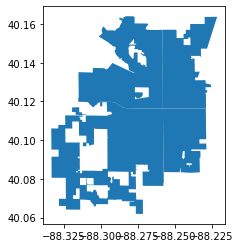

In [4]:
policearea.plot()

In [5]:
policearea['NAME'].unique()

array(['N', 'S', 'SW', 'NW'], dtype=object)

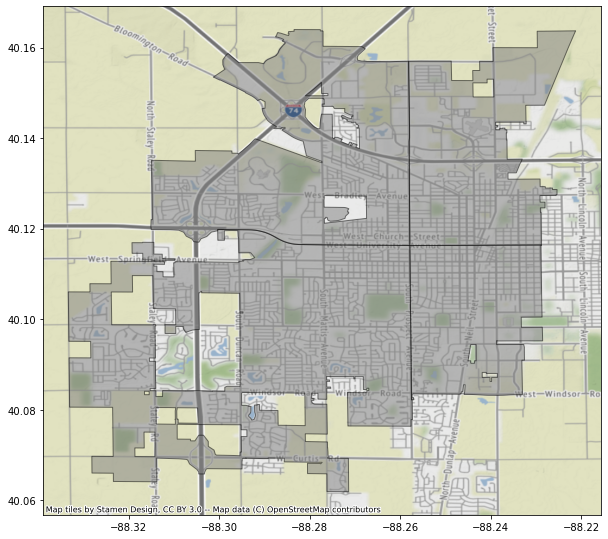

In [6]:
fig, ax = plt.subplots(figsize=(10,10))

policearea.plot(ax=ax, color = 'grey', alpha= 0.5, edgecolor = 'k')

ctx.add_basemap(ax=ax, crs=policearea.crs)

plt.show()

Add apartment dataset

In [7]:
apr = geopandas.read_file('https://opendata.arcgis.com/datasets/64154052c5a040e287bae1583d727825_8.geojson')


<AxesSubplot:>

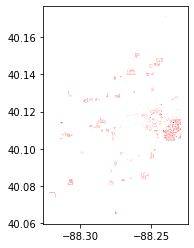

In [8]:
apr.plot(color = "red")

In [9]:
apr

,OBJECTID,Address,Parcel,Units,Stories,UniqueID,Building_Name,Complex_Name,Case_Number,Building_Type,...,Comments,Safety_Comments,Fire_Alarms,Sprinkler,Managing_Company,MFRecyclingStatus,ShapeSTArea,ShapeSTLength,Shape,geometry
0,1,2009 Moreland Blvd,412001126038,36,3,0.0,2009 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19657.997437,929.167804,None,"POLYGON ((-88.25315 40.14017, -88.25315 40.140..."
1,2,2011 Moreland Blvd,412001126038,36,3,1.0,2011 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19735.512329,950.194217,None,"POLYGON ((-88.25260 40.14057, -88.25256 40.140..."
2,3,2007 Moreland Blvd,412001126038,24,3,2.0,2007 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13970.178833,678.398035,None,"POLYGON ((-88.25274 40.14045, -88.25274 40.140..."
3,4,2003 Moreland Blvd,412001126038,36,3,3.0,2003 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,19739.423340,941.358477,None,"POLYGON ((-88.25154 40.13978, -88.25156 40.139..."
4,5,2005 Moreland Blvd,412001126038,24,3,4.0,2005 Moreland Blvd,University Village at Champaign,AI07-0147,Complex,...,,,Yes,Yes,None,Yes,13065.121582,636.744457,None,"POLYGON ((-88.25351 40.13934, -88.25348 40.139..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2312,3679,4550 Nicklaus Dr,462029402001,None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,11853.411499,521.384332,None,"POLYGON ((-88.32130 40.07657, -88.32145 40.076..."
2313,3680,4510 Nicklaus Dr,462029402001,None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,11073.249023,503.919987,None,"POLYGON ((-88.31920 40.07663, -88.31922 40.076..."
2314,3681,4502 Nicklaus Dr,462029402001,None,None,NaN,None,None,None,None,...,None,None,None,None,None,None,15584.976929,759.631935,None,"POLYGON ((-88.31818 40.07667, -88.31842 40.076..."
2315,4071,210 S Fourth St,462107377002 thru -004,77,7,NaN,None,None,None,Building,...,None,None,None,None,None,None,16389.222778,846.476530,None,"POLYGON ((-88.23274 40.11487, -88.23278 40.114..."


In [10]:
apr['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', None, 'Other'],
      dtype=object)

In [11]:
apr.loc[apr['Building_Type'].isnull(), 'Building_Type'] = "Unspecified"

In [12]:
apr['Building_Type'].unique()

array(['Complex', 'Building', 'House', 'Over Commercial', 'Unspecified',
       'Other'], dtype=object)

Combine plots i.e multi layer maps, with building type given rainbow colors

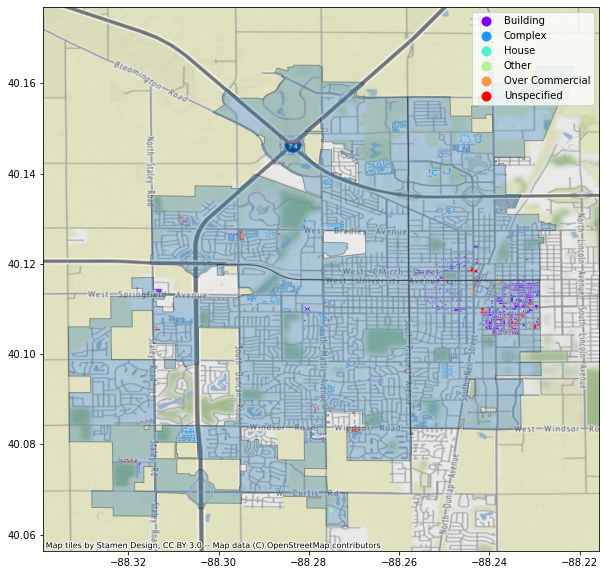

In [13]:
fig, ax = plt.subplots(figsize=(10,10))

policearea.plot(ax=ax, alpha= 0.3, edgecolor = 'k')

apr.plot(column = "Building_Type", ax = ax , cmap = 'rainbow', categorical = True, legend = True)


ctx.add_basemap(ax=ax, crs=policearea.crs)

plt.show()

I have included the selection for different building types and their associated places in the police districts get shown and colored.

In [31]:
@ipywidgets.interact(b_type = apr['Building_Type'].unique())
def geopandas_plot(b_type):
    apr_b_type = apr.loc[apr['Building_Type']==b_type]
    
    fig, ax= plt.subplots(1,1, figsize = (10,10))
    
    
    policearea.plot(column = "NAME", ax=ax, alpha= 0.9, cmap= 'Greens', edgecolor = 'k', categorical = True, legend = True)

    apr_b_type.plot(column = 'Building_Type', ax = ax , cmap = 'rainbow', categorical = True, legend = True)
    

    ctx.add_basemap(ax=ax, crs=policearea.crs.to_string())

    plt.show()
    

interactive(children=(Dropdown(description='b_type', options=('Complex', 'Building', 'House', 'Over Commercial…